# Criando uma apresentação executiva

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


### Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [1]:
# Configuração do ambiente

# Garante que o notebook está na raiz do projeto
%cd .. 

# Verifica o diretório atual (Linux/Mac)
# !pwd  

# Verifica o diretório atual (Windows)
!cd 

C:\Users\flavi\Documents\GitHub\Projeto_3_Financas_com_Apresentacao_Final_em_PPT
C:\Users\flavi\Documents\GitHub\Projeto_3_Financas_com_Apresentacao_Final_em_PPT


In [2]:
# Importações necessárias 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from src.config.paths import DADOS_SAMS_CLUB

warnings.filterwarnings('ignore')

In [3]:
base = pd.read_csv(DADOS_SAMS_CLUB)
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Entendendo e tratando a base

In [4]:
# Visualizando as informações da base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [5]:
# Verificando os registros com Postal Code vazio

base.loc[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [6]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code

base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
# Filtrando para cidade de Burlington, estado de Vermont e código postal não nulo

base[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


- Concluimos que, pelo filtro, quando a cidade é Burlington e o Estado é Vermont, não existe código postal que não seja nulo.	

**Podemos ir diretamente no google para buscar essa informação**

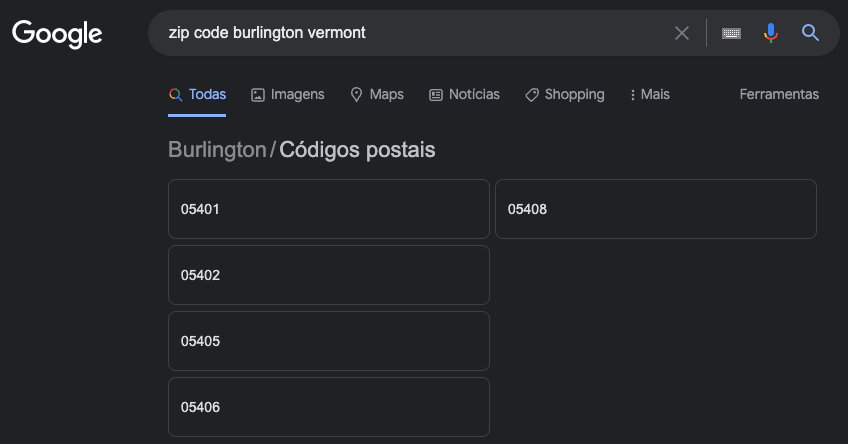

In [8]:
# Mostrando, com a ajuda do .loc, onde os valores são nulos (quando a cidade é Burlington e o Estado é Vermont)

base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull()), ['Postal Code']]

,Postal Code
2234,NaN
5274,NaN
8798,NaN
9146,NaN
9147,NaN
9148,NaN
9386,NaN
9387,NaN
9388,NaN
9389,NaN


In [9]:
# Atualizando essa informação - Atribuindo o código postal que antes estava nulo

base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull()), ['Postal Code']] = 5401

In [10]:
# Verificando se ainda existe algum valor nulo

base.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
# Visualizando novamente as informações da base para conferir se o código postal foi inserido corretamente

base[(base.City == 'Burlington') & (base.State == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
# Filtrando novamente com a juda do .loc somente para se ter certeza de que não há valor nulo nesse filtro

base[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


### <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> que queremos exibir?**

In [13]:
# Para entender a data, podemos ver de qual período estamos falando (buscando o valor mínimo - data inicial)

base['Order Date'].min()

'01/01/2018'

**<font color="red">ATENÇÃO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [14]:
# Importando o Datetime

import datetime as dt

In [15]:
# Convertendo as colunas de data para datetime

base['Order Date'] = pd.to_datetime(base['Order Date'], format='%d/%m/%Y')
base['Order Date'] = pd.to_datetime(base['Order Date'], format='%d/%m/%Y')
base['Ship Date'] = pd.to_datetime(base['Ship Date'], format='%d/%m/%Y')

In [16]:
# Observando como ficaram as informações da base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [17]:
# Podemos ver novamente de qual período estamos falando (buscando o valor mínimo - data inicial)

base['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

- Podemos observar que erraríamos na data, se não passassemos o Order Date de object para datetime.

In [18]:
# Buscando o máximo da data

base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [19]:
# Criando uma coluna com o ano

base['Ano'] = base['Order Date'].dt.year

In [20]:
# Visualisando a base com a nova coluna

base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


### Utilizando o groupby para agrupar as colunas que queremos no gráfico (Ano e Soma das Vendas)

In [21]:
# Usando a coluno 'Ano' no group by e criando um plot de barras para visualizar a soma das vendas

base.groupby(['Ano'])[['Sales']].sum()

,Sales
Ano,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


### Mostrando o resultado final do gráfico Vendas por Ano.

In [22]:
vendas_ano = base.groupby(['Ano'])[['Sales']].sum()

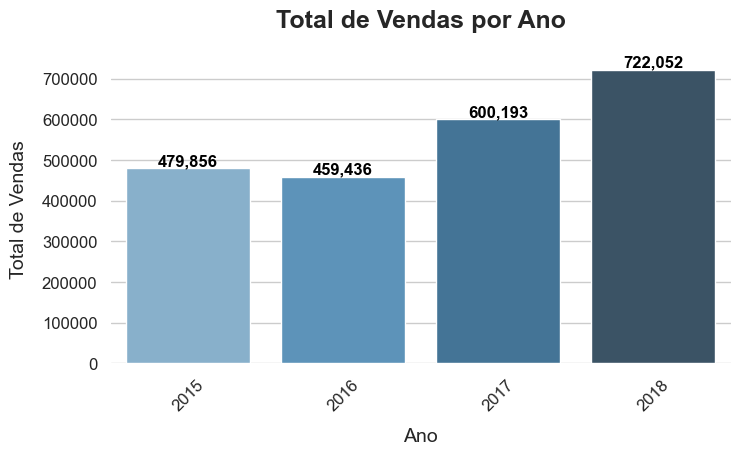

In [23]:
# Configuração do estilo do gráfico
sns.set_theme(style="whitegrid")

# Criando a figura e o gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=vendas_ano, x="Ano", y="Sales", palette="Blues_d")

# Adicionando rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Melhorando a apresentação
plt.title("Total de Vendas por Ano", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Ano", fontsize=14, labelpad=10)
plt.ylabel("Total de Vendas", fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

# Exibir gráfico
plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [24]:
# Criando uma coluna com o mês

base['Mês'] = base['Order Date'].dt.month

In [25]:
# Visualisando a base com a nova coluna

base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mês
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


### Agora temos que agrupar por mês e ano. Isso porque, por exemplo, existe janeiro de 2015, de 2016, etc.

In [26]:
# Fazendo o groupby agora por mês e ano e verificando os valores gerados

base.groupby(['Mês', 'Ano'])[['Sales']].sum().head()

Sales
Mês Ano             
1   2015  14205.7070
    2016  18066.9576
    2017  18542.4910
    2018  43476.4740
2   2015   4519.8920

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**
- Isso é necessário porque temos multiindex (janeiro, por exemplo, pertencente aos quatro anos analisados)

### Mostrando o resultado final do gráfico Vendas por Mês.

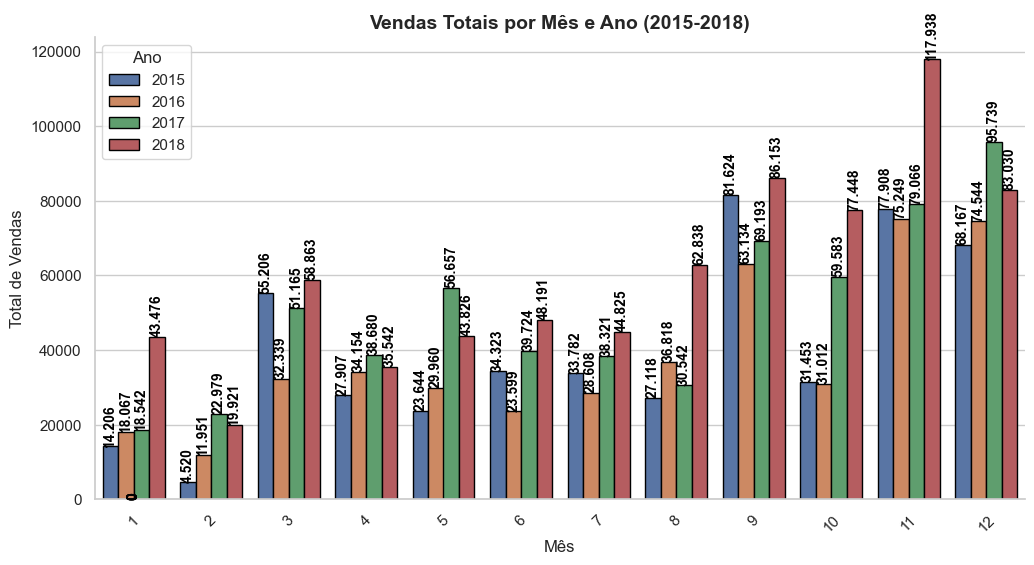

In [27]:
# Configuração do estilo do gráfico
sns.set_style("whitegrid")

# Agrupar os dados somando as vendas por mês e ano
vendas_agrupadas = base.groupby(["Mês", "Ano"]) ["Sales"].sum().reset_index()

# Criar a figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
ax = sns.barplot(data=vendas_agrupadas, x="Mês", y="Sales", hue="Ano", palette="deep", edgecolor="black")

# Adicionar rótulos de vendas para cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f"{altura:,.0f}".replace(",", "X").replace(".", ",").replace("X", "."),
                (p.get_x() + p.get_width() / 2, altura),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black", rotation=90)

# Melhorias visuais
plt.title("Vendas Totais por Mês e Ano (2015-2018)", fontsize=14, fontweight="bold")
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Total de Vendas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Ano", loc="upper left")
sns.despine()

# Exibir o gráfico
plt.show()

### <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [28]:
# Visualizando novamente a base (somente as duas primeiras linhas)

base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mês
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [29]:
# Podemos fazer um groupby da categoria com vendas

base.groupby(['Category'])[['Sales']].sum()

,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [30]:
# Agrupando por ano e categoria

base.groupby(['Ano', 'Category'])[['Sales']].sum()

Sales
Ano  Category                    
2015 Furniture        156477.8811
     Office Supplies  149512.8200
     Technology       173865.5070
2016 Furniture        164053.8674
     Office Supplies  133124.4070
     Technology       162257.7310
2017 Furniture        195813.0400
     Office Supplies  182417.5660
     Technology       221961.9440
2018 Furniture        212313.7872
     Office Supplies  240367.5410
     Technology       269370.6910

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [31]:
# Criando agora a base de categorias como fizemos anteriormente

categoria = base.groupby(['Category', 'Ano'])[['Sales']].sum().reset_index()

In [32]:
# Visualizando (Agora ficou fácil de visualizar qual categora vendeu mais em cada ano)

categoria

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


### Plotanto o gráfico Vendas por Categorias.

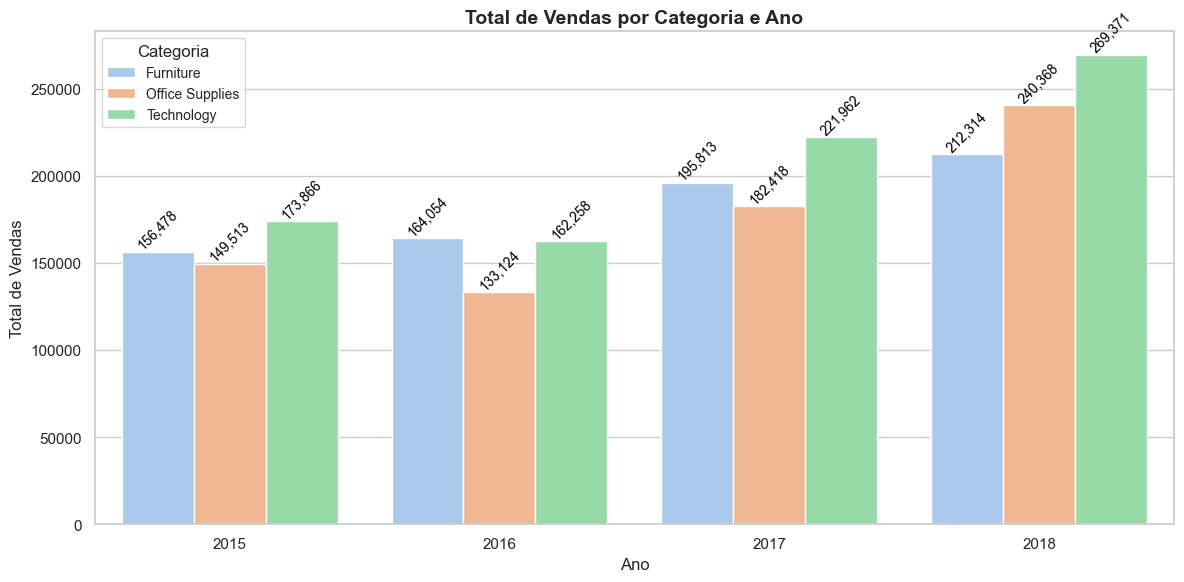

In [33]:
# Configuração do estilo
sns.set_theme(style="whitegrid", palette="pastel")

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=categoria, 
    x="Ano", 
    y="Sales", 
    hue="Category", 
    dodge=True
)

# Adicionando rótulos acima das barras, ajustando para não sobrepor
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=10, 
                    color='black', 
                    rotation=45)

# Configuração do gráfico
plt.title("Total de Vendas por Categoria e Ano", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Vendas", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Categoria", title_fontsize=12, fontsize=10)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [34]:
# Visualizando a base novamente

base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mês
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [35]:
# Podemos fazer um groupby do item (nome do produto) por vendas

base.groupby(['Product Name'])[['Sales']].sum()

,Sales
Product Name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 itens**
- Mais uma vez, para facilitar para a plotagem do gráfico, vamos usar o reset_index para gegar o DataFrame com a coluna de index

In [36]:
itens = base.groupby(['Product Name'])[['Sales']].sum()

itens = itens.reset_index()

In [37]:
# Visualinando após resolver a questão dos itens

itens.head()

,Product Name,Sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [38]:
# Ordenando a base itens por vendas

itens = base.groupby(['Product Name'])[['Sales']].sum().sort_values(by='Sales', ascending=False)

In [39]:
# Visualizando o top 10 itens
n = 10

top_n_itens = itens.head(n)
top_n_itens

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


### Top 10 Produtos Mais Vendidos.

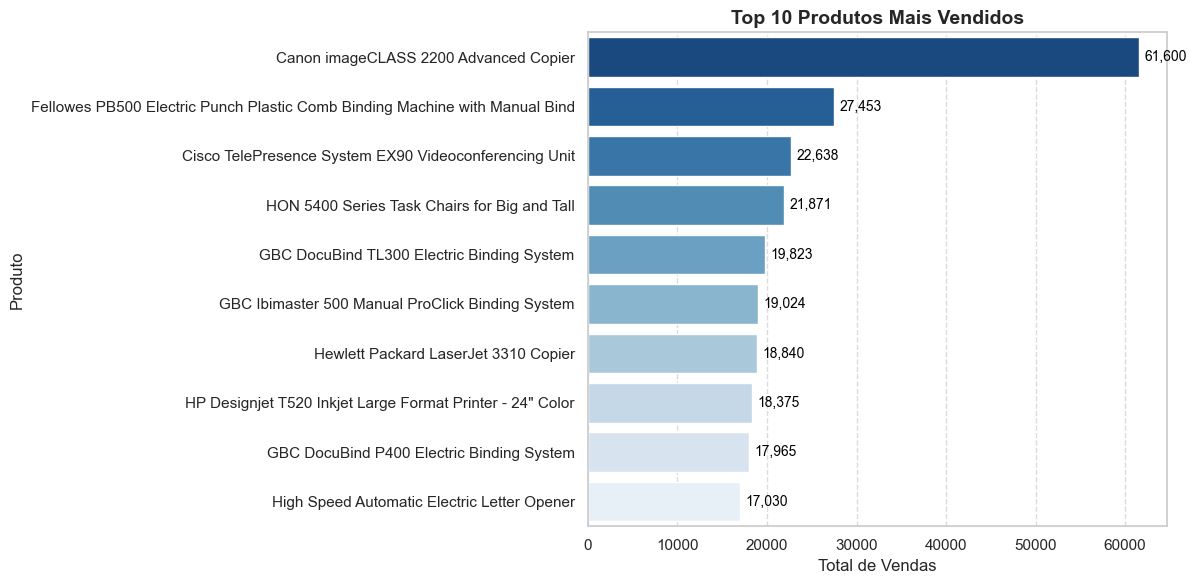

In [40]:
# Configuração do estilo
sns.set_theme(style="whitegrid", palette="coolwarm")

# Criando a figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_n_itens,
    x="Sales",
    y=top_n_itens.index,
    palette="Blues_r"
)

# Adicionando rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:,.0f}', 
                (width + max(top_n_itens["Sales"]) * 0.01, p.get_y() + p.get_height() / 2),
                ha='left', va='center', 
                fontsize=10, color='black')

# Configuração do gráfico
plt.title("Top 10 Produtos Mais Vendidos", fontsize=14, fontweight="bold")
plt.xlabel("Total de Vendas", fontsize=12)
plt.ylabel("Produto", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### <font color="blue"> Qualis os ítens mais vendidos por ano? </font>

**Agora agrupando por ítem e ano**

In [41]:
# Podemos fazer um groupby de item e ano e resolvendo a questão do index

itens_ano = base.groupby(['Product Name', 'Ano'])[['Sales']].sum().sort_values(by='Sales', ascending=False)
itens_ano = itens_ano.reset_index()

In [42]:
#Visualizando

itens_ano

,Product Name,Ano,Sales
0,Canon imageCLASS 2200 Advanced Copier,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
2,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.480
3,Fellowes PB500 Electric Punch Plastic Comb Bin...,2016,15760.276
4,GBC Ibimaster 500 Manual ProClick Binding System,2017,12860.562
...,...,...,...
5269,Universal Recycled Hanging Pressboard Report B...,2015,1.234
5270,Avery Binder Labels,2015,1.167
5271,Acco Economy Flexible Poly Round Ring Binder,2015,1.044
5272,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",2016,0.984


In [43]:
itens_ano = itens_ano.groupby(['Product Name', 'Ano'])[['Sales']].sum().sort_values(by='Sales', ascending=False)
itens_ano

Sales
Product Name                                       Ano            
Canon imageCLASS 2200 Advanced Copier              2018  35699.898
                                                   2017  25899.926
Cisco TelePresence System EX90 Videoconferencin... 2015  22638.480
Fellowes PB500 Electric Punch Plastic Comb Bind... 2016  15760.276
GBC Ibimaster 500 Manual ProClick Binding System   2017  12860.562
...                                                            ...
Universal Recycled Hanging Pressboard Report Bi... 2015      1.234
Avery Binder Labels                                2015      1.167
Acco Economy Flexible Poly Round Ring Binder       2015      1.044
Avery Triangle Shaped Sheet Lifters, Black, 2/Pack 2016      0.984
Avery Round Ring Poly Binders                      2015      0.852

[5274 rows x 1 columns]

In [44]:
# Passo 1: Agrupar o dataframe por 'Product Name' e 'Ano' e somar as vendas
sales_by_product_year = itens_ano.groupby(['Product Name', 'Ano'])['Sales'].sum().reset_index()

# Passo 2: Calcular as vendas totais por produto
total_sales_per_product = sales_by_product_year.groupby('Product Name')['Sales'].sum()

# Passo 3: Selecionar os 20 produtos mais vendidos
top_20_products = total_sales_per_product.nlargest(20).index

# Passo 4: Filtrar o dataframe para incluir apenas os top 20 produtos
filtered_sales = sales_by_product_year[sales_by_product_year['Product Name'].isin(top_20_products)]

# Passo 5: Reformular o dataframe para que mostre as vendas por ano
pivoted_sales = filtered_sales.pivot(index='Product Name', columns='Ano', values='Sales').fillna(0)

# Mostrar o resultado
pivoted_sales

Ano,2015,2016,2017,2018
Product Name,,,,
"3D Systems Cube Printer, 2nd Generation, Magenta",0.000,0.000,9099.9300,5199.9600
Apple iPhone 5,5328.606,0.000,5198.6400,2469.3540
Bretford Rectangular Conference Table Tops,5190.594,1053.164,3498.0090,3253.5245
Canon imageCLASS 2200 Advanced Copier,0.000,0.000,25899.9260,35699.8980
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,0.000,0.0000,0.0000
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,2033.584,15760.276,2287.7820,7371.7420
GBC DocuBind P400 Electric Binding System,5443.960,0.000,5443.9600,7077.1480
GBC DocuBind TL300 Electric Binding System,5740.736,1345.485,1793.9800,10943.2780
GBC Ibimaster 500 Manual ProClick Binding System,0.000,5402.958,12860.5620,760.9800


### Produtos Mais Vendidos Por Ano.

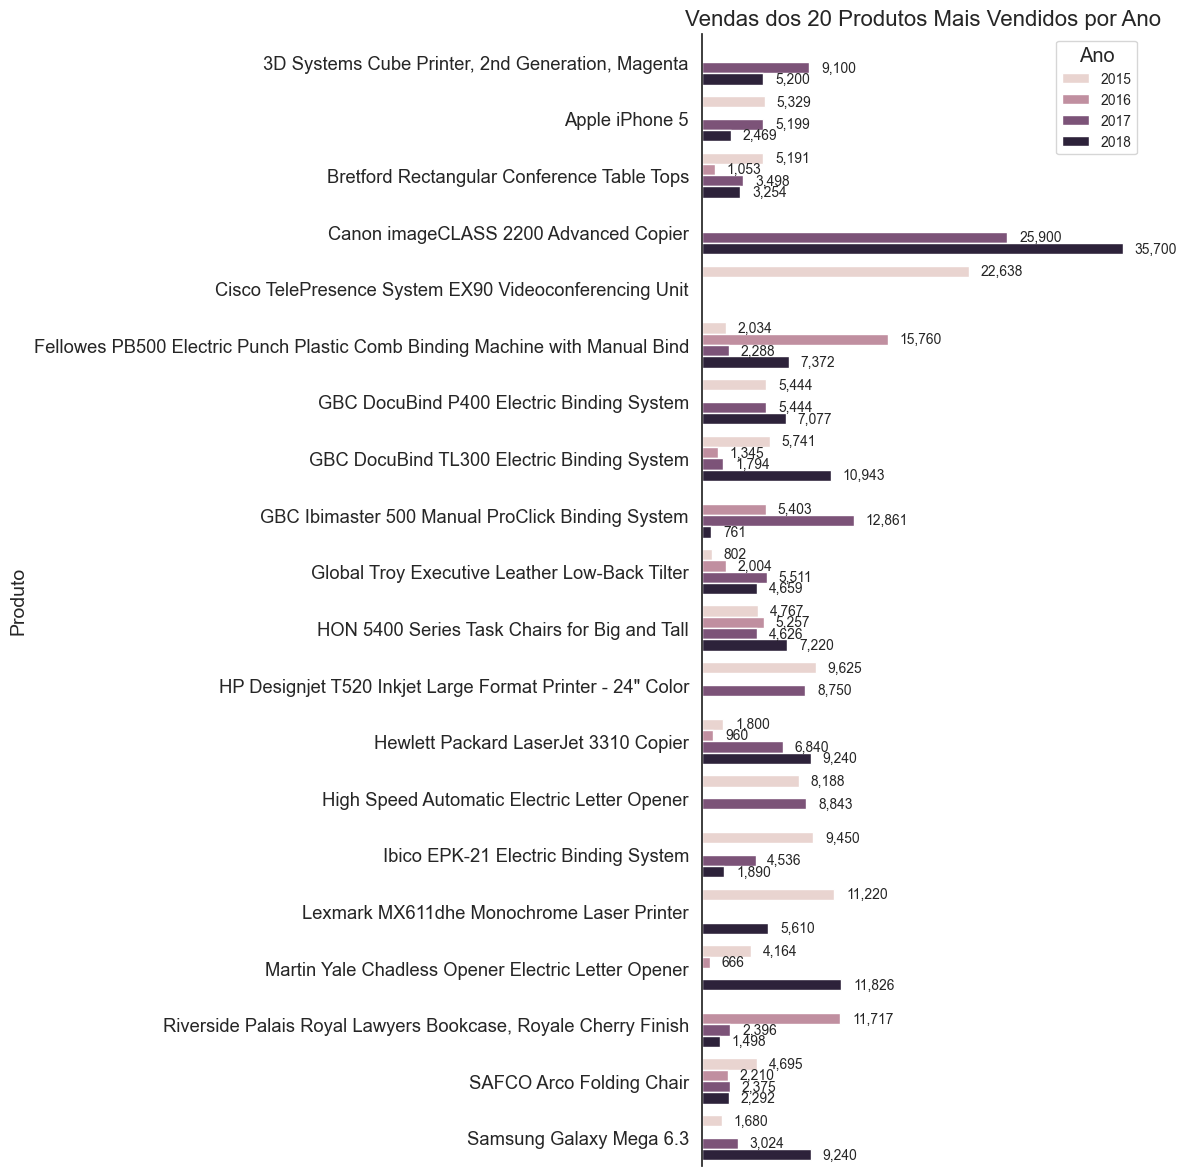

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Transformar o dataframe de formato largo para longo
pivoted_sales_long = pivoted_sales.reset_index().melt(id_vars='Product Name', var_name='Ano', value_name='Sales')

# Ordenar os produtos de acordo com as vendas totais (em ordem decrescente)
total_sales_per_product = pivoted_sales_long.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_20_products = total_sales_per_product.head(20).index
pivoted_sales_long = pivoted_sales_long[pivoted_sales_long['Product Name'].isin(top_20_products)]

# Configuração do estilo do seaborn
sns.set(style="white", palette="muted", font_scale=1.2)

# Criação do gráfico
plt.figure(figsize=(12, 12))

# Gráfico de barras horizontais para as vendas dos 20 produtos mais vendidos por ano
ax = sns.barplot(x='Sales', y='Product Name', hue='Ano', data=pivoted_sales_long, dodge=True)

# Remover o eixo X
plt.gca().axes.get_xaxis().set_visible(False)

# Remover todas as linhas, mantendo apenas a linha vertical à esquerda onde as barras partem
ax.grid(False)  # Desabilita a grade
ax.spines['left'].set_visible(True)  # Mantém apenas a linha vertical à esquerda
ax.spines['top'].set_visible(False)  # Remove a linha superior
ax.spines['right'].set_visible(False)  # Remove a linha à direita
ax.spines['bottom'].set_visible(False)  # Remove a linha inferior

# Adicionar a pontuação de milhar aos valores das barras
def fmt_milhares(x, pos):
    return f'{x:,.0f}'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(fmt_milhares))

# Adicionar os valores ao lado de cada barra apenas para as vendas maiores que zero
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Garantir que a barra tenha vendas maiores que zero
        label = f'{width:,.0f}'  # Formata a venda com pontuação de milhar
        ax.text(width + 1000, p.get_y() + p.get_height() / 2, label, va='center', ha='left', fontsize=10)

# Títulos e labels
plt.title('Vendas dos 20 Produtos Mais Vendidos por Ano', fontsize=16)  # Título sem (2018)
plt.xlabel('Vendas', fontsize=14)
plt.ylabel('Produto', fontsize=14)

# Exibição da legenda
plt.legend(title='Ano', loc='upper right', fontsize=10)

# Ajustar o layout para garantir boa visualização
plt.tight_layout()

# Exibição do gráfico
plt.show()